In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import ast
import functions.merge as merge
import importlib
importlib.reload(merge)

<module 'functions.merge' from '/Users/chayapatr/Papers/uist-25/functions/merge.py'>

In [2]:
embeddings = pd.read_csv('data/embeddings/small.csv')
embeddings['embedding'] = embeddings['embedding'].apply(lambda x: ast.literal_eval(x))

In [3]:
clustered, cluster_representatives = merge.process_keywords(embeddings)

merged = pd.DataFrame(columns=["representative", "members"])

for cluster_id, info in cluster_representatives.items():
    print(f"\nCluster {cluster_id}:")
    print(f"Representative: {info['representative']}")
    print(f"All members: {', '.join(info['members'])}")
    merged.loc[len(merged)] = [info['representative'], info['members']]
    
merged.to_csv('data/graph/merged_keys.csv', index=False)

DBSCAN(eps=0.05, metric='cosine', min_samples=2)

Cluster 0:
Representative: co|partner
All members: co|partnership, co|partner

Cluster 1:
Representative: ai|sentiment
All members: ai|sentiment, ai|sentiment_analysis

Cluster 2:
Representative: ai|medical
All members: ai|health, ai|medical

Cluster 3:
Representative: co|organizational
All members: co|organizational, co|organization

Cluster 4:
Representative: human|writer
All members: human|reader, human|storywriter, human|writer, human|creativewriter, human|author

Cluster 5:
Representative: human|demographic
All members: human>demographic, human|demographic

Cluster 6:
Representative: ai>integration
All members: ai|integration, ai>integration

Cluster 7:
Representative: human>frustration
All members: human>#frustration, human>frustration

Cluster 8:
Representative: ai|automated
All members: ai|automation, ai|automated

Cluster 9:
Representative: ai|simulation
All members: ai|simulation, ai|simulated

Cluster 10:
Representative: ai|p

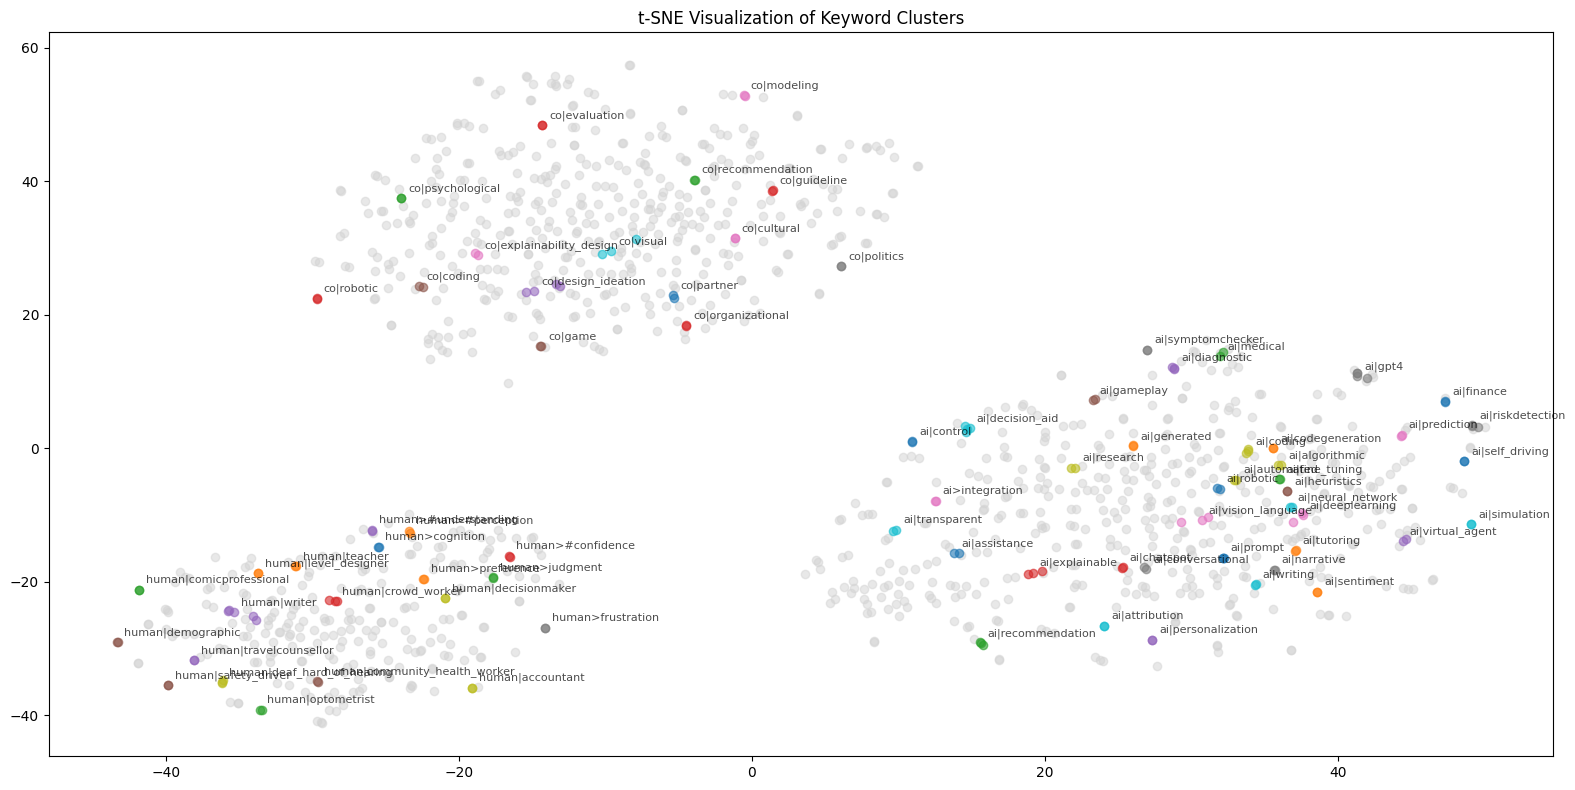

In [4]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

res = set([cluster_representatives[k]['representative'] for k in cluster_representatives])

def visualize_clusters(df, embeddings, perplexity=30, random_state=42):
    # Create t-SNE embedding
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=random_state)
    embeddings_2d = tsne.fit_transform(embeddings)
    
    # Add t-SNE coordinates to dataframe
    df_viz = df.copy()
    df_viz['x'] = embeddings_2d[:, 0]
    df_viz['y'] = embeddings_2d[:, 1]
    
    # Set up the plot
    plt.figure(figsize=(16, 8))
    
    # Create color palette for clusters
    n_clusters = len(df_viz['cluster'].unique())
    palette = sns.color_palette("husl", n_clusters)
    
    # Plot noise points first
    noise_mask = df_viz['cluster'] == -1
    plt.scatter(df_viz[noise_mask]['x'], 
                df_viz[noise_mask]['y'], 
                c='lightgray',
                alpha=0.5,
                label='Noise')
    
    # Plot clusters
    for cluster_id in sorted(df_viz['cluster'].unique()):
        if cluster_id == -1:
            continue
            
        mask = df_viz['cluster'] == cluster_id
        plt.scatter(df_viz[mask]['x'], 
                   df_viz[mask]['y'], 
                   label=f'Cluster {cluster_id}',
                   alpha=0.6)
    
    # # Add labels for some points (optional)
    for idx, row in df_viz.iterrows():
        if row['cluster'] != -1 and row['keyword'] in res:  # Only label clustered points
            plt.annotate(row['keyword'], 
                        (row['x'], row['y']),
                        xytext=(5, 5),
                        textcoords='offset points',
                        fontsize=8,
                        alpha=0.7)
    
    plt.title('t-SNE Visualization of Keyword Clusters')
    # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # hide axis labels
    
    
    plt.tight_layout()
    
    return plt.gcf()

keywords, x = merge.prepare_embeddings(embeddings)
fig = visualize_clusters(clustered, x)